In [17]:
%pylab inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib

Populating the interactive namespace from numpy and matplotlib


In [19]:
PATH_TO_DATA = os.getcwd()
PATH_TO_DATA = PATH_TO_DATA[:-PATH_TO_DATA[::-1].find("/")]
#PATH_TO_DATA += "data/6-months/"
PATH_TO_DATA += "data/2019-2months-1d/"
btc_df = pd.read_csv(PATH_TO_DATA + "Binance_BTCUSDT_1d_1 Jan, 2019-1 Mar, 2019.csv", sep='\t')

In [20]:
def candles_view(open, high, low, close, volume, hours):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    k = 24/hours

    r_width = 0.8 / k
    periods = range(len(open))
    for timestamp in periods:
        r_height = abs(open[timestamp] - close[timestamp]) + 0.1
        r_x = timestamp/k - r_width/2.0
        r_y = min(open[timestamp], close[timestamp])
        if (open[timestamp] > close[timestamp]):
            ax.add_patch(patches.Rectangle((r_x, r_y), r_width, r_height, facecolor='r'))
            plt.plot([timestamp/k, timestamp/k], [low[timestamp], high[timestamp]], 'r')
        else:
            ax.add_patch(patches.Rectangle((r_x, r_y), r_width, r_height, facecolor='g'))
            plt.plot([timestamp/k, timestamp/k], [low[timestamp], high[timestamp]], 'g')

    #mng = plt.get_current_fig_manager()
    #mng.resize(*mng.window.maxsize())
    plt.show()

<Figure size 936x576 with 0 Axes>

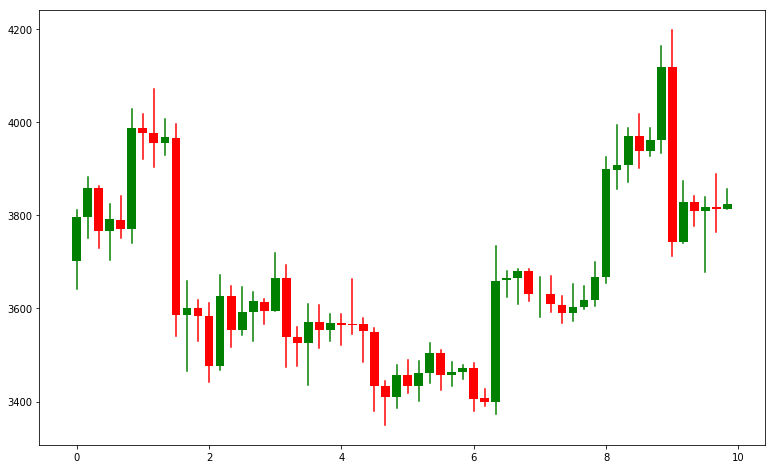

In [21]:
#%matplotlib qt
plt.figure(figsize(13,8))
candles_view(btc_df["open"].values, 
             btc_df["high"].values, 
             btc_df["low"].values, 
             btc_df["close"].values, 
             btc_df["volume"].values, 4)

In [25]:
btc_df.head()

,open time,open,high,low,close,volume,number of trades
0,2019-01-01,3701.23,3810.16,3642.00,3797.14,23741.7,154227
1,2019-01-02,3796.45,3882.14,3750.45,3858.56,35156.5,218538
2,2019-01-03,3857.57,3862.74,3730.00,3766.78,29406.9,199812
3,2019-01-04,3767.20,3823.64,3703.57,3792.01,29519.6,192232
4,2019-01-05,3790.09,3840.99,3751.00,3770.96,30490.7,203673


In [23]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
from datetime import datetime

df = pd.read_csv(PATH_TO_DATA + "Binance_BTCUSDT_1d_1 Jan, 2019-1 Mar, 2019.csv", sep='\t')

trace = go.Candlestick(x=df['open_time'],
                open=df['open'],
                high=df['high'],
                low=df['AAPL.Low'],
                close=df['AAPL.Close'])
data = [trace]
py.iplot(data, filename='simple_candlestick')

/home/alex/.local/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

